# Flask Liberary

#### Flask:  Flask is a web application framework written in Python. it is based on the Werkzeug WSGI toolkit and Jinja2 template engine. which are projects of Pocco projects.

#### WSGI: Web Server Gateway Interface (WSGI) has been adopted as a standard for Python web application development. WSGI is a specification for a universal interface between the web server and the web applications.

### Install virtualenv for development environment

#### virtualenv is a virtual Python environment builder. It helps a user to create multiple Python environments side-by-side. Thereby, it can avoid compatibility issues between the different versions of the libraries.

   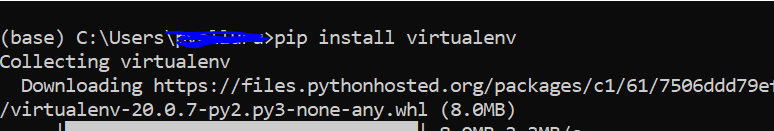

#### Once installed, new virtual environment is created in a folder. 
##### mkdir newproj 
##### cd newproj
##### virtualenv venv

In [ ]:
# Flask Application

In [ ]:
from flask import Flask

In [ ]:
app = Flask(__name__)

@app.route('/')
def hello_world():
    s = "HelloWorld"
    return s

if __name__ == '__main__':
    app.run()

In [ ]:
from flask import request

In [ ]:
app = Flask(__name__)

@app.route('/sum')
def sumation():
    num1 = request.args.get("num1")
    num2 = request.args.get("num2")
    if num1 and num2:
        result = str(int(num1) + int(num2))
    else:
        result = 'Arguments are incorrect.'
    return result

if __name__ == '__main__':
    app.run()

In [ ]:
app = Flask(__name__)

@app.route('/jsontest', methods= ['POST'])
def JsonTest():
    num1 = request.json['num1']
    num2 = request.json['num2']
    if num1 and num2:
        addTwo = str(int(num1) + int(num2))
    else:
        addTwo = 'Arguments are not proper.'
    return addTwo

@app.route('/sum', methods=['GET'])
def sumation():
    num1 = request.args.get("num1")
    num2 = request.args.get("num2")
    if num1 and num2:
        result = str(int(num1) + int(num2))
    else:
        result = 'Arguments are incorrect.'
    return result

@app.route('/', methods=['GET'])
def handle():
    return 'Hello World'

if __name__ == '__main__':
    app.run()

In [ ]:
import os
import pandas as pd
import numpy

In [ ]:
os.environ['DataSetPath'] = r'C:/Users/pvalluru/Desktop/Python_practice/INeuron.ai/Files Shared/'
dataSetPath = os.environ['DataSetPath'] + 'Salaries.csv'
print("Flask Pandas Data Set: "+ str(dataSetPath))

In [ ]:
import os
import pandas as pd
import numpy

app = Flask(__name__)

@app.route('/columns', methods=['GET'])
def getCoulumns():
    os.environ['DataSetPath'] = r'C:/Users/pvalluru/Desktop/Python_practice/INeuron.ai/Files Shared/'
    dataSetPath = os.environ['DataSetPath'] + 'Salaries.csv'
    print(dataSetPath)
    columnsFrame = pd.read_csv(dataSetPath)
    columns = list(columnsFrame.columns)
    return str(columns)

@app.route('/columns/salaryData', methods=['GET'])
def getSalaryDataFrame():
    column = request.args.get('columnName')
    operation = request.args.get('operation')
    os.environ['DataSetPath'] = r'C:/Users/pvalluru/Desktop/Python_practice/INeuron.ai/Files Shared/'
    dataSetPath = os.environ['DataSetPath'] + 'Salaries.csv'
    if not column and not operation:
        return 'Passed arugments are incorrect.'
    else:
        readFrame = pd.read_csv(dataSetPath)
        columns = list(readFrame.columns)
        if column in columns:
            columnFrame = readFrame[[column]]
            
        if operation == 'mean':
            op = columnFrame.mean()
        elif operation == 'count':
            op = columnFrame.count()
            
        return str(op)
        
    
if __name__=='__main__':
    app.run()

## web Scrapping for Data Science

#### Web scraping is the process of gathering information from the Internet. Even copy-pasting the lyrics of your favorite song is a form of web scraping! However, the words “web scraping” usually refer to a process that involves automation.

In [ ]:
!pip install bs4

In [1]:
import bs4

#### Beautiful soap is a good way to parse HTML Text. Beautiful Soup is a Python library for parsing structured data. It allows you to interact with HTML in a similar way to how you would interact with a web page using developer tools. Beautiful Soup exposes a couple of intuitive functions you can use to explore the HTML you received.  
#### it's easy and good way to traverse HTML text within python.

In [ ]:
# Now, we need a web client to grab something from internet. 
# we have a package called as URLLIB. inside URL lib there is a module called as request. 
# inside module there is function called as URL open 

In [2]:
from urllib.request import urlopen as uRequest

In [3]:
from bs4 import BeautifulSoup as soup

In [79]:
myURL = 'https://www.newegg.com/Video-Cards-Video-Devices/Category/ID-38?Tpk=graphics%20card'

In [80]:
myURL

'https://www.newegg.com/Video-Cards-Video-Devices/Category/ID-38?Tpk=graphics%20card'

In [81]:
# we are opening the request. open connection and download
uClient = uRequest(myURL)

In [82]:
page_html = uClient.read()

In [83]:
# this is an open internet connection. so we need to close the connetion once it is open.
uClient.close()

In [84]:
# parse the text from html.
page_soup = soup(page_html, "html.parser")

In [85]:
page_soup

<!DOCTYPE HTML>

<html lang="en-us">
<head>
<script src="//imk.neweggimages.com/WebResource/Scripts/usa/strc/usa_prod/d2f967b83a0c92b19d9b572545fdbdc3d591f6f5/biztralib.js"></script>
<script src="//imk.neweggimages.com/webresource/scripts/plugin/inhousebiztra.js"></script>
<title>Graphics Cards and Video Cards - Newegg.com</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="always" name="referrer"/>
<meta content="Graphics Cards, Video Cards" name="keywords"/>
<meta content="Shop a wide selection of Video Graphics Cards from EVGA, Gigabyte, MSI &amp; more! Newegg offers the best prices, fast shipping and top-rated customer service!" name="description"/>
<meta content="https://c1.neweggimages.com/WebResource/Themes/2005/Nest/logo_424x210.png" property="og:image"/>
<meta content="Shop a wide selection of Video Graphics Cards from EVGA, Gigabyte, MSI &amp; more! Newegg offers the best prices, fast shipping and top-rated customer service!" property="

In [10]:
# this grabs the header.
page_soup.h1

<h1 class="page-title-text">Video Cards &amp; Video Devices</h1>

In [11]:
# we can request for any tags we want like p, dev, href etc.
page_soup.p

<p>Newegg.com - A great place to buy computers, computer parts, electronics, software, accessories, and DVDs online. With great prices, fast shipping, and top-rated customer service - Newegg shopping upgraded ™</p>

In [12]:
page_soup.body.span

<span class="noCSS">Skip to:</span>

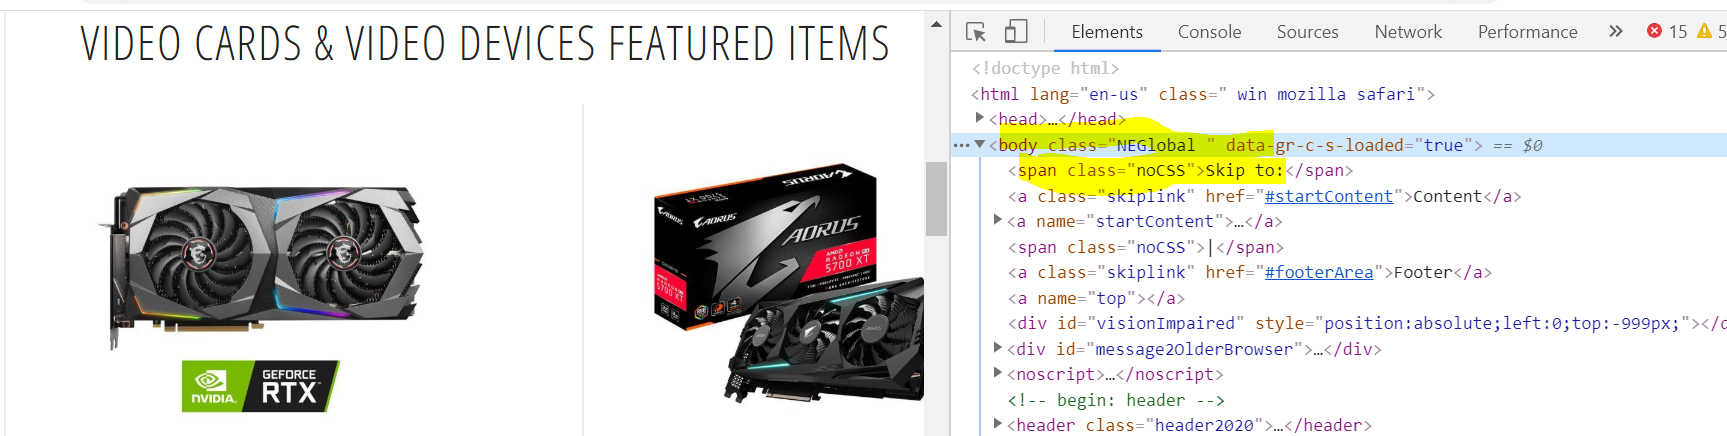

In [13]:
# grabs each product
containers = page_soup.findAll("div", {"class": "item-container"})

In [14]:
type(containers)

bs4.element.ResultSet

In [15]:
len(containers)

12

In [16]:
# the html
containers[0]

<div class="item-container">
<!--product image-->
<a class="item-img" href="https://www.newegg.com/msi-geforce-rtx-2070-super-rtx-2070-super-gaming-x/p/N82E16814137445?Item=N82E16814137445">
<div class="item-badges">
</div>
<img alt="MSI GeForce RTX 2070 SUPER DirectX 12 RTX 2070 Super GAMING X 8GB 256-Bit GDDR6 PCI Express 3.0 x16 HDCP Ready SLI Support Video Card" class="lazy-img" data-effect="fadeIn" data-src="//c1.neweggimages.com/NeweggImage/ProductImageCompressAll300/14-137-445-V21.jpg" src="//c1.neweggimages.com/WebResource/Themes/2005/Nest/blank.gif" title="MSI GeForce RTX 2070 SUPER DirectX 12 RTX 2070 Super GAMING X 8GB 256-Bit GDDR6 PCI Express 3.0 x16 HDCP Ready SLI Support Video Card">
</img></a>
<div class="item-info">
<!--brand info-->
<div class="item-branding">
<a class="item-brand" href="https://www.newegg.com/MSI/BrandStore/ID-1312">
<img alt="MSI" class="lazy-img" data-effect="fadeIn" data-src="//c1.neweggimages.com/Brandimage_70x28//Brand1312.gif" src="//c1.neweggi

In [17]:
container = containers[0]

In [18]:
container.a

<a class="item-img" href="https://www.newegg.com/msi-geforce-rtx-2070-super-rtx-2070-super-gaming-x/p/N82E16814137445?Item=N82E16814137445">
<div class="item-badges">
</div>
<img alt="MSI GeForce RTX 2070 SUPER DirectX 12 RTX 2070 Super GAMING X 8GB 256-Bit GDDR6 PCI Express 3.0 x16 HDCP Ready SLI Support Video Card" class="lazy-img" data-effect="fadeIn" data-src="//c1.neweggimages.com/NeweggImage/ProductImageCompressAll300/14-137-445-V21.jpg" src="//c1.neweggimages.com/WebResource/Themes/2005/Nest/blank.gif" title="MSI GeForce RTX 2070 SUPER DirectX 12 RTX 2070 Super GAMING X 8GB 256-Bit GDDR6 PCI Express 3.0 x16 HDCP Ready SLI Support Video Card">
</img></a>

In [19]:
itemInfo = container.findAll("div", {"class": "item-info"})

In [20]:
item = itemInfo[0]

In [21]:
item

<div class="item-info">
<!--brand info-->
<div class="item-branding">
<a class="item-brand" href="https://www.newegg.com/MSI/BrandStore/ID-1312">
<img alt="MSI" class="lazy-img" data-effect="fadeIn" data-src="//c1.neweggimages.com/Brandimage_70x28//Brand1312.gif" src="//c1.neweggimages.com/WebResource/Themes/2005/Nest/blank.gif" title="MSI">
</img></a>
<!--rating info-->
<a class="item-rating" href="https://www.newegg.com/msi-geforce-rtx-2070-super-rtx-2070-super-gaming-x/p/N82E16814137445?Item=N82E16814137445&amp;SortField=0&amp;SummaryType=0&amp;PageSize=10&amp;SelectedRating=-1&amp;VideoOnlyMark=False&amp;IsFeedbackTab=true#scrollFullInfo" title="Rating + 5"><i class="rating rating-5"></i><span class="item-rating-num">(29)</span></a>
</div>
<!--description info-->
<a class="item-title" href="https://www.newegg.com/msi-geforce-rtx-2070-super-rtx-2070-super-gaming-x/p/N82E16814137445?Item=N82E16814137445" title="View Details">MSI GeForce RTX 2070 SUPER DirectX 12 RTX 2070 Super GAMING

In [22]:
item.div.a

<a class="item-brand" href="https://www.newegg.com/MSI/BrandStore/ID-1312">
<img alt="MSI" class="lazy-img" data-effect="fadeIn" data-src="//c1.neweggimages.com/Brandimage_70x28//Brand1312.gif" src="//c1.neweggimages.com/WebResource/Themes/2005/Nest/blank.gif" title="MSI">
</img></a>

In [23]:
item.find("a", {"class": "item-title"}).text

'MSI GeForce RTX 2070 SUPER DirectX 12 RTX 2070 Super GAMING X Video Card'

In [24]:
title = item.div.a.img['title']

In [25]:
title

'MSI'

In [26]:
# now, we can loop over all the containers by using iteratiors.
for con in containers:
    items = con.findAll("div", {"class": "item-info"})
    brand = items[0].div.a.img["title"]
    product_name = items[0].find("a", {"class": "item-title"}).text.strip()
    shipping = items[0].find("li", {"class": "price-ship"}).text.strip()
    print("brand: "+ str(brand))
    print("product_name: "+ str(product_name))
    print("shipping: "+ str(shipping))
    

brand: MSI
product_name: MSI GeForce RTX 2070 SUPER DirectX 12 RTX 2070 Super GAMING X Video Card
shipping: Free Shipping
brand: GIGABYTE
product_name: GIGABYTE AORUS Radeon RX 5700 XT 8G Graphics Card, PCIe 4.0, 8GB 256-Bit GDDR6, GV-R57XTAORUS-8GD Video Card
shipping: Free Shipping
brand: ASUS
product_name: ASUS ROG STRIX GeForce RTX 2060 DirectX 12 ROG-STRIX-RTX2060-O6G-GAMING Video Card
shipping: Free Shipping
brand: EVGA
product_name: EVGA GeForce RTX 2080 Ti DirectX 12 11G-P4-2281-KR BLACK EDITION GAMING Video Card, Dual HDB Fans & RGB LED
shipping: $6.99 Shipping
brand: ASUS
product_name: ASUS ROG Strix GeForce RTX 2080 Ti DirectX 12 ROG-STRIX-RTX2080TI-O11G-GAMING Video Card
shipping: Free Shipping
brand: XFX
product_name: XFX Radeon RX 5600 XT DirectX 12 RX-56XT6DFD6 Video Card
shipping: $3.99 Shipping
brand: MSI
product_name: MSI GeForce RTX 2070 DirectX 12 RTX 2070 TRI FROZR Video Card
shipping: Free Shipping
brand: GIGABYTE
product_name: GIGABYTE Radeon RX 580 GAMING 8G (re

In [27]:
# writing into CSV

In [28]:
filename = "products_newegg.csv"
f = open(filename, "w")
headers = "brand, product_name, shipping"
f.write(headers+ "\n")
# now, we can loop over all the containers by using iteratiors.
for con in containers:
    items = con.findAll("div", {"class": "item-info"})
    brand = items[0].div.a.img["title"]
    product_name = items[0].find("a", {"class": "item-title"}).text.strip()
    shipping = items[0].find("li", {"class": "price-ship"}).text.strip()
    f.write(brand+','+product_name.replace(",","|")+","+shipping+ "\n")
f.close()

In [29]:
# file muct be created in CSV

In [30]:
from bs4 import BeautifulSoup as soap
from urllib.request import urlopen as uRequest

In [71]:
flipkart_url = "https://www.flipkart.com/search?q=iphone%20x&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

In [72]:
flipkart_url

'https://www.flipkart.com/search?q=iphone%20x&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [73]:
flipkartClient = uRequest(flipkart_url)

In [74]:
flipkartClientData = flipkartClient.read()

In [75]:
flipkartClient.close()

In [76]:
flipkartClientData

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<link href="https://rukminim1.flixcart.com" rel="dns-prefetch" />\n\t<link href="https://img1a.flixcart.com" rel="dns-prefetch" />\n\t<link rel="stylesheet" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.0bf2d8.css" />\n\n\t<link rel="preload" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/fk-logo_9fddff.png" as="image">\n\n\t<meta http-equiv="Content-type" content="text/html; charset=utf-8"/>\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n\t<meta property="fb:page_id" content="102988293558"/>\n\t<meta property="fb:admins" content="658873552,624500995,100000233612389"/>\n\t<meta name="robots" content="noodp" />\n\n\t<link rel=\'shortcut icon\' href="https://img1a.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" />\n\n\t<link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/>\n\n\t<meta property="og:type" content="website"/>\n\t<meta name="og_site_name" prop

In [77]:
flipkart_page_soap = soup(flipkartClientData, "html.parser")

In [78]:
flipkart_page_soap

<!DOCTYPE html>

<html lang="en">
<head>
<link href="https://rukminim1.flixcart.com" rel="dns-prefetch"/>
<link href="https://img1a.flixcart.com" rel="dns-prefetch"/>
<link href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.0bf2d8.css" rel="stylesheet"/>
<link as="image" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/fk-logo_9fddff.png" rel="preload"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="102988293558" property="fb:page_id"/>
<meta content="658873552,624500995,100000233612389" property="fb:admins"/>
<meta content="noodp" name="robots"/>
<link href="https://img1a.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon">
<link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
<meta content="website" property="og:type"/>
<meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
<!-- Appple Tou

In [86]:
containers = flipkart_page_soap.body.div.findAll("div", {"class": "_1UoZlX"})

In [87]:
len(containers)

24

In [88]:
containers = flipkart_page_soap.body.div.findAll("div", {"class": "_1UoZlX"})

CollectionDict = {}
for container in containers:
    deviceName = container.find("div", {"class": "_3wU53n"}).text
    CollectionDict['deviceName'] = deviceName.replace(',','|')
    ratingCount, reviewCount = tuple(str(container.find("span", {"class": "_38sUEc"}).span.text).split('&'))
    CollectionDict['rating count'] = ratingCount.strip().replace(',','|')
    CollectionDict['review count'] = reviewCount.strip().replace(',','|')
    description = container.findAll("li", {"class": "tVe95H"})
    CollectionDict['Memory'] = ""
    CollectionDict['Display'] = ""
    CollectionDict['Camera'] = ""
    CollectionDict['Architecture'] = ""
    CollectionDict['Warranty'] = ""
    CollectionDict['Price'] = ""
    CollectionDict['Actual Price'] = ""
    CollectionDict['Discount'] = ""

    for eachDes in description:
        item = eachDes.text.lower()
        if "gb" in item or 'mb' in item:
            CollectionDict['Memory'] = item.replace(',','|')
        elif "display" in item:
            CollectionDict['Display'] = item.replace(',','|')
        elif "camera" in item:
            CollectionDict['Camera'] = item.replace(',','|')
        elif "bit" in item or "architecture" in item:
            CollectionDict['Architecture'] = item.replace(',','|')
        elif "Warranty" in item:
            CollectionDict['Warranty'] = item.replace(',','|')

    containerPrice = container.find("div", {"class": "_1vC4OE _2rQ-NK"}).text
    CollectionDict['Price'] = containerPrice.replace(',','|')
    try:
        containerActualPrice = container.find("div", {"class": "_3auQ3N _2GcJzG"}).text
        containerPercentage = container.find("div", {"class": "VGWI6T"}).text
        CollectionDict['Actual Price'] = containerActualPrice.replace(',','|')
        CollectionDict['Discount'] = containerPercentage.replace(',','|')
    except Exception as exc:
        CollectionDict['Actual Price'] = ""
        CollectionDict['Discount'] = ""
    print(str(CollectionDict['deviceName'])+','+str(CollectionDict['rating count'])+","+str(CollectionDict['review count'])+","+str(CollectionDict['Memory'])+","+str(CollectionDict['Display'])+","+str(CollectionDict['Camera'])+","+str(CollectionDict['Architecture'])+","+str(CollectionDict['Warranty'])+","+str(CollectionDict['Price'])+","+str(CollectionDict['Actual Price'])+","+str(CollectionDict['Discount']))

Apple iPhone X (Silver| 64 GB),10|704 Ratings,878 Reviews,a11 bionic chip with 64-bit architecture| neural engine| embedded m11 motion coprocessor processor,14.73 cm (5.8 inch) super retina hd display,12mp + 12mp | 7mp front camera,,,₹80|539,,
Apple iPhone X (Space Gray| 64 GB),10|704 Ratings,878 Reviews,a11 bionic chip with 64-bit architecture| neural engine| embedded m11 motion coprocessor processor,14.73 cm (5.8 inch) super retina hd display,12mp + 12mp | 7mp front camera,,,₹69|999,₹91|900,23% off
Apple iPhone X (Space Gray| 256 GB),10|704 Ratings,878 Reviews,a11 bionic chip with 64-bit architecture| neural engine| embedded m11 motion coprocessor processor,14.73 cm (5.8 inch) super retina hd display,12mp + 12mp | 7mp front camera,,,₹67|000,₹99|900,32% off
Apple iPhone X (Silver| 256 GB),10|704 Ratings,878 Reviews,a11 bionic chip with 64-bit architecture| neural engine| embedded m11 motion coprocessor processor,14.73 cm (5.8 inch) super retina hd display,12mp + 12mp | 7mp front camer

In [3]:
flipkart_iphone_link = 'https://www.flipkart.com/apple-iphone-x-space-gray-64-gb/p/itmexrgv6hctyrav?pid=MOBEXRGVCMGVCGGQ&lid=LSTMOBEXRGVCMGVCGGQFLD1LA&marketplace=FLIPKART&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=04dc65b1-5747-40c8-8b69-7be58ca4c7d1.MOBEXRGVCMGVCGGQ.SEARCH&ssid=2sccpk47j40000001583224738229&qH=882a0465d260983a'

In [4]:
flipkart_iphone_link

'https://www.flipkart.com/apple-iphone-x-space-gray-64-gb/p/itmexrgv6hctyrav?pid=MOBEXRGVCMGVCGGQ&lid=LSTMOBEXRGVCMGVCGGQFLD1LA&marketplace=FLIPKART&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=04dc65b1-5747-40c8-8b69-7be58ca4c7d1.MOBEXRGVCMGVCGGQ.SEARCH&ssid=2sccpk47j40000001583224738229&qH=882a0465d260983a'

In [5]:
requestLinkFlipkart = uRequest(flipkart_iphone_link)

NameError: name 'uRequest' is not defined

In [42]:
readRequestLink = requestLinkFlipkart.read()

In [43]:
requestLinkFlipkart.close()

In [44]:
soupFlipKart = soup(readRequestLink, "html.parser")

In [45]:
soupFlipKart

<!DOCTYPE html>

<html lang="en">
<head>
<link href="https://rukminim1.flixcart.com" rel="dns-prefetch"/>
<link href="https://img1a.flixcart.com" rel="dns-prefetch"/>
<link href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.0bf2d8.css" rel="stylesheet"/>
<link as="image" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/fk-logo_9fddff.png" rel="preload"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="102988293558" property="fb:page_id"/>
<meta content="658873552,624500995,100000233612389" property="fb:admins"/>
<meta content="noodp" name="robots"/>
<link href="https://img1a.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon">
<link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
<meta content="website" property="og:type"/>
<meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
<!-- Appple Tou

In [46]:
rating = soupFlipKart.div.findAll("div",{"class": "col _390CkK"}).div.find("div",{"class": "hGSR34 E_uFuv"}).text

In [1]:
reviewHeader = soupFlipKart.div.find("div",{"class": "col _390CkK"})

NameError: name 'soupFlipKart' is not defined

In [48]:
reviewHeader

'Classy product'

In [49]:
rating

'5'

In [50]:
soupFlipKart.div.find("div",{"class": "qwjRop"}).div.div.text

'Thank you flikart and supercom net for the genuine deals...'

In [66]:
soupFlipKart.div.findAll("p",{"class": "_3LYOAd"})[0].text

'Flipkart Customer'

In [67]:
soupFlipKart.div.findAll("p",{"class": "_3LYOAd"})[1].text

'9 months ago'

In [69]:
soupFlipKart.div.find("p",{"class":"_19inI8"}).text

'Certified Buyer, New Delhi'

In [6]:
from urllib.request import urlopen as uRequest
from bs4 import BeautifulSoup as soup

In [10]:
flipkart_iphone_link = 'https://www.flipkart.com/apple-iphone-x-space-gray-64-gb/p/itmexrgv6hctyrav?pid=MOBEXRGVCMGVCGGQ&lid=LSTMOBEXRGVCMGVCGGQFLD1LA&marketplace=FLIPKART&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=04dc65b1-5747-40c8-8b69-7be58ca4c7d1.MOBEXRGVCMGVCGGQ.SEARCH&ssid=2sccpk47j40000001583224738229&qH=882a0465d260983a'
requestListFlipkart = uRequest(flipkart_iphone_link)
htmlPageRead = requestListFlipkart.read()
requestListFlipkart.close()
readFlipkartLink = soup(htmlPageRead, "html.parser")
print(readFlipkartLink.h1.text)

Apple iPhone X (Space Gray, 64 GB)


In [65]:
DictFrame = {}
l = []
for eacRead in readFlipkartLink.findAll("div",{"class": "col _390CkK"}):
        DictFrame = {}
        productMainReview = eacRead.div.find("p", {"class": "_2xg6Ul"}).text
        DictFrame["productMainReview"] = productMainReview
        productMainRating = eacRead.div.find("div", {"class": "hGSR34 E_uFuv"}).text
        DictFrame["productMainRating"] = productMainRating
        reviewComments = eacRead.find("div",{"class": "qwjRop"}).div.div.text
        DictFrame["reviewComments"] = reviewComments
        customerInfo = eacRead.find("div",{"class":"row _2pclJg"}).p.text
        DictFrame["customerInfo"] = customerInfo
        certificationInfo = eacRead.find("p",{"class":"_19inI8"}).text
        DictFrame["certificationInfo"] = certificationInfo
        dateInfo = eacRead.findAll("p",{"class": "_3LYOAd"})[1].text
        DictFrame['dateInfo'] = dateInfo
        likesInfo, disLinkInfo = tuple(eacRead.findAll("span",{"class": "_1_BQL8"}))
        likesInfo = likesInfo.text
        DictFrame["likesInfo"] = likesInfo
        disLikesInfo = disLinkInfo.text
        DictFrame["disLikesInfo"] = disLikesInfo
        print(DictFrame)
        l.append(DictFrame)

{'productMainReview': 'Classy product', 'productMainRating': '5', 'reviewComments': 'Thank you flikart and supercom net for the genuine deals...', 'customerInfo': 'Flipkart Customer', 'certificationInfo': 'Certified Buyer, New Delhi', 'dateInfo': '9 months ago', 'likesInfo': '1401', 'disLikesInfo': '194'}
{'productMainReview': 'Good choice', 'productMainRating': '4', 'reviewComments': 'Awesome just like a Performance beast.Best ever OLED screen with Top notch Performance Backed by A11Bionic Chipset.Battery life is average.Supb daylight Shots On this', 'customerInfo': 'Sourav Kumar', 'certificationInfo': 'Certified Buyer, Bhubaneswar', 'dateInfo': '9 months ago', 'likesInfo': '1317', 'disLikesInfo': '219'}
{'productMainReview': 'Highly recommended', 'productMainRating': '5', 'reviewComments': 'You’re going to be an apple fan after this purchase.', 'customerInfo': 'Dhinesh R', 'certificationInfo': 'Certified Buyer, Coimbatore', 'dateInfo': 'Jan, 2019', 'likesInfo': '1417', 'disLikesInfo'

In [66]:
l

[{'productMainReview': 'Classy product',
  'productMainRating': '5',
  'reviewComments': 'Thank you flikart and supercom net for the genuine deals...',
  'customerInfo': 'Flipkart Customer',
  'certificationInfo': 'Certified Buyer, New Delhi',
  'dateInfo': '9 months ago',
  'likesInfo': '1401',
  'disLikesInfo': '194'},
 {'productMainReview': 'Good choice',
  'productMainRating': '4',
  'reviewComments': 'Awesome just like a Performance beast.Best ever OLED screen with Top notch Performance Backed by A11Bionic Chipset.Battery life is average.Supb daylight Shots On this',
  'customerInfo': 'Sourav Kumar',
  'certificationInfo': 'Certified Buyer, Bhubaneswar',
  'dateInfo': '9 months ago',
  'likesInfo': '1317',
  'disLikesInfo': '219'},
 {'productMainReview': 'Highly recommended',
  'productMainRating': '5',
  'reviewComments': 'You’re going to be an apple fan after this purchase.',
  'customerInfo': 'Dhinesh R',
  'certificationInfo': 'Certified Buyer, Coimbatore',
  'dateInfo': 'Jan,

In [59]:
import pandas as pd

In [67]:
flipFrame = pd.DataFrame(l)

In [68]:
flipFrame

,productMainReview,productMainRating,reviewComments,customerInfo,certificationInfo,dateInfo,likesInfo,disLikesInfo
0,Classy product,5,Thank you flikart and supercom net for the gen...,Flipkart Customer,"Certified Buyer, New Delhi",9 months ago,1401,194
1,Good choice,4,Awesome just like a Performance beast.Best eve...,Sourav Kumar,"Certified Buyer, Bhubaneswar",9 months ago,1317,219
2,Highly recommended,5,You’re going to be an apple fan after this pur...,Dhinesh R,"Certified Buyer, Coimbatore","Jan, 2019",1417,269
3,Must buy!,5,Nice camera quality,Flipkart Customer,Certified Buyer,6 months ago,715,133
4,Terrific purchase,5,nice phone .....I like Flipkart...... service ...,Anwar Zameer,"Certified Buyer, Aligarh","Nov, 2018",3039,636
5,Mind-blowing purchase,5,Loved to have it :) Great device.,Flipkart Customer,"Certified Buyer, Bhubaneswar","Oct, 2018",1451,301
6,Simply awesome,5,excellent phone & service,Sandeep Patil,"Certified Buyer, Bhiwandi","May, 2018",3451,754
7,Worth every penny,5,Awsm camera 👍🏻👍🏻,Sunil Kumar,"Certified Buyer, Balia",4 months ago,44,4
8,Great product,5,this phone is only for iphone lovers,Flipkart Customer,"Certified Buyer, Saharsa",11 months ago,948,204
9,Terrific,5,Nice phone,Anku Kumar,"Certified Buyer, Gumla District",9 months ago,59,7


In [73]:
# Next page url: https://www.flipkart.com/apple-iphone-x-space-gray-64-gb/product-reviews/itmexrgv6hctyrav?pid=MOBEXRGVCMGVCGGQ&lid=LSTMOBEXRGVCMGVCGGQLHGFDF&marketplace=FLIPKART
flipkart_iphone_next_link = 'https://www.flipkart.com/apple-iphone-x-space-gray-64-gb/product-reviews/itmexrgv6hctyrav?pid=MOBEXRGVCMGVCGGQ&lid=LSTMOBEXRGVCMGVCGGQLHGFDF&marketplace=FLIPKART'
requestNextListFlipkart = uRequest(flipkart_iphone_next_link)
htmlNextPageRead = requestNextListFlipkart.read()
requestListFlipkart.close()
readNextFlipkartLink = soup(htmlNextPageRead, "html.parser")

In [74]:
len(readNextFlipkartLink.findAll("div",{"class": "col _390CkK _1gY8H-"}))

10

In [82]:
import pandas as pd
DictMainFrame = {}
l1 = []
for eacRead in readNextFlipkartLink.findAll("div",{"class": "col _390CkK _1gY8H-"}):
        DictFrame = {}
        productMainReview = eacRead.div.find("p", {"class": "_2xg6Ul"}).text
        DictFrame["productMainReview"] = productMainReview
        productMainRating = eacRead.div.find("div", {"class": "hGSR34 E_uFuv"}).text
        DictFrame["productMainRating"] = productMainRating
        reviewComments = eacRead.find("div",{"class": "qwjRop"}).div.div.text
        DictFrame["reviewComments"] = reviewComments
        customerInfo = eacRead.find("div",{"class":"row _2pclJg"}).p.text
        DictFrame["customerInfo"] = customerInfo
        certificationInfo = eacRead.find("p",{"class":"_19inI8"}).text
        DictFrame["certificationInfo"] = certificationInfo
        dateInfo = eacRead.findAll("p",{"class": "_3LYOAd"})[1].text
        DictFrame['dateInfo'] = dateInfo
        likesInfo, disLinkInfo = tuple(eacRead.findAll("span",{"class": "_1_BQL8"}))
        likesInfo = likesInfo.text
        DictFrame["likesInfo"] = likesInfo
        disLikesInfo = disLinkInfo.text
        DictFrame["disLikesInfo"] = disLikesInfo
        l1.append(DictFrame)
reviewDataframe = pd.DataFrame(l1)

In [84]:
# filpkart review for one single page.

In [83]:
reviewDataframe

,productMainReview,productMainRating,reviewComments,customerInfo,certificationInfo,dateInfo,likesInfo,disLikesInfo
0,Classy product,5,Thank you flikart and supercom net for the gen...,Flipkart Customer,"Certified Buyer, New Delhi",9 months ago,1401,194
1,Good choice,4,Awesome just like a Performance beast.Best eve...,Sourav Kumar,"Certified Buyer, Bhubaneswar",9 months ago,1318,219
2,Highly recommended,5,You’re going to be an apple fan after this pur...,Dhinesh R,"Certified Buyer, Coimbatore","Jan, 2019",1417,269
3,Must buy!,5,Nice camera quality,Flipkart Customer,Certified Buyer,6 months ago,715,133
4,Terrific purchase,5,nice phone .....I like Flipkart...... service ...,Anwar Zameer,"Certified Buyer, Aligarh","Nov, 2018",3039,636
5,Mind-blowing purchase,5,Loved to have it :) Great device.,Flipkart Customer,"Certified Buyer, Bhubaneswar","Oct, 2018",1451,301
6,Simply awesome,5,excellent phone & service,Sandeep Patil,"Certified Buyer, Bhiwandi","May, 2018",3451,754
7,Worth every penny,5,Awsm camera 👍🏻👍🏻,Sunil Kumar,"Certified Buyer, Balia",4 months ago,44,4
8,Great product,5,this phone is only for iphone lovers,Flipkart Customer,"Certified Buyer, Saharsa",11 months ago,948,204
9,Terrific,5,Nice phone,Anku Kumar,"Certified Buyer, Gumla District",9 months ago,59,7
